<a href="https://colab.research.google.com/github/Alla-tech/VKR/blob/main/%D0%92%D0%9A%D0%A0_%D1%87%D0%B0%D1%81%D1%82%D1%8C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [4]:
from sklearn.pipeline import make_pipeline, Pipeline

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.svm import SVR

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.neural_network import MLPRegressor

Скачивание файла, созданного по результатам предобработки данных

In [9]:
df_norm_n = pd.read_excel(r"/content/drive/MyDrive/resultpart_2.xlsx")

In [10]:
df = pd.read_excel(r"/content/drive/MyDrive/Result2.xlsx")

4. Обучение моделей для прогноза прочности при растяжении и модуля упругости при растяжении

4.1 Прогноз модуля прочности при растяжении

In [11]:
#Тестовая и тренировочная выборки
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_norm_n.loc[:, df_norm_n.columns != 'Прочность при растяжении, МПа'], df[['Прочность при растяжении, МПа']], test_size = 0.3, random_state = 42)

In [12]:
#Просмотр данных в тренировочной выборке
x_train_1.head()

,Unnamed: 0,Unnamed: 0.1,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
133,133,0.035722,0.000789,0.508691,0.171888,0.014722,0.006592,0.064803,0.029342,0.019564,0.082068,0.000000,0.001103,0.018959
756,756,0.266165,0.000783,0.632725,0.199177,0.041730,0.007638,0.078724,0.088242,0.023313,0.040472,0.028688,0.003731,0.017132
693,693,0.200629,0.000667,0.517102,0.165035,0.035731,0.006546,0.073462,0.154556,0.019242,0.061132,0.023542,0.001041,0.011276
853,853,0.323273,0.000929,0.686399,0.140878,0.013341,0.006704,0.098453,0.027696,0.025983,0.028492,0.031051,0.002985,0.024533
501,501,0.153947,0.001058,0.537247,0.305972,0.038354,0.005743,0.064567,0.267748,0.019883,0.049043,0.024566,0.001319,0.015614


In [13]:
y_train_1

,"Прочность при растяжении, МПа"
133,3460.438212
756,2150.828833
693,3033.723583
853,1811.860024
501,2624.109841
...,...
106,2192.765045
270,2312.890280
860,2948.968467
435,3337.690563


In [14]:
#Просмотр данных в тестовой выборке
y_test_1

,"Прочность при растяжении, МПа"
321,1823.256512
70,2757.130303
209,2811.005983
656,2605.463153
685,2039.609992
...,...
371,1799.493329
430,2167.241512
292,2607.261304
412,1831.362292


In [15]:
x_test_1

,Unnamed: 0,Unnamed: 0.1,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
321,321,0.123677,0.000989,0.696505,0.232265,0.037636,0.007280,0.097687,0.184124,0.026811,0.069702,0.000000,0.003719,0.024380
70,70,0.020670,0.000528,0.535682,0.340452,0.025135,0.006050,0.079398,0.153756,0.018815,0.057634,0.000000,0.002515,0.011044
209,209,0.059671,0.000442,0.528964,0.397708,0.032436,0.005646,0.069549,0.162909,0.018348,0.051470,0.000000,0.000507,0.017247
656,656,0.209698,0.001322,0.545471,0.239391,0.029591,0.006433,0.085202,0.153800,0.022365,0.087722,0.025853,0.001954,0.017887
685,685,0.243765,0.001111,0.664984,0.047616,0.024684,0.007775,0.086165,0.230043,0.022599,0.066014,0.028905,0.001727,0.017015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,371,0.139444,0.001028,0.677383,0.309949,0.029728,0.008314,0.098119,0.213468,0.023294,0.068924,0.000000,0.001782,0.018773
430,430,0.161062,0.000881,0.634908,0.146984,0.032965,0.007415,0.116614,0.105520,0.025051,0.047632,0.000000,0.001904,0.021026
292,292,0.096221,0.001324,0.627383,0.064493,0.030608,0.007680,0.069782,0.037104,0.021686,0.060199,0.000000,0.000910,0.013189
412,412,0.146298,0.000985,0.648873,0.170680,0.053601,0.006175,0.104799,0.409855,0.022061,0.078450,0.000000,0.003014,0.025701


In [16]:
#Создание функции для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_1):
    return [np.mean(y_test_1) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [17]:
# Первая модель - Метод случайного леса
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train_1, y_train_1.values)
y_pred_forest = rfr.predict(x_test_1)
mae_rfr = mean_absolute_error(y_pred_forest, y_test_1)
mse_rfr_elast = mean_squared_error(y_test_1,y_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr.score(x_train_1, y_train_1)))
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_1, y_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast)))
print("Test score: {:.2f}".format(rfr.score(x_test_1, y_test_1)))

Random Forest Regressor Results Train:
Test score: 0.98
Random Forest Regressor Results:
RF_MAE:  84
RF_MAPE: 0.03
RF_MSE: 11118.78
RF_RMSE: 105.45
Test score: 0.95


<ipython-input-17-bf21b4c8a37e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train_1, y_train_1.values)


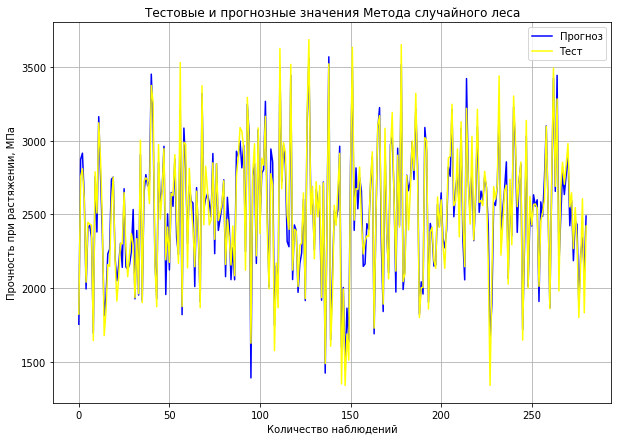

In [18]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Метода случайного леса")
plt.plot(y_pred_forest, label = "Прогноз", color = "blue")
plt.plot(y_test_1.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [19]:
#Вторая модель - Метод опорных векторов
svr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
svr.fit(x_train_1, np.ravel(y_train_1))
y_pred_svr=svr.predict(x_test_1)
mae_svr = mean_absolute_error(y_pred_svr, y_test_1)
mse_svr_elast = mean_squared_error(y_test_1,y_pred_svr)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr.score(x_train_1, y_train_1)))
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_1, y_pred_svr)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_svr)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast)))
print("Test score: {:.2f}".format(svr.score(x_test_1, y_test_1)))

Support Vector Regression Results Train:
Test score: 0.99
Support Vector Regression Results:
SVR_MAE: 69
SVR_MAPE: 0.03
SVR_MSE: 8880.22
SVR_RMSE: 94.23
Test score: 0.96


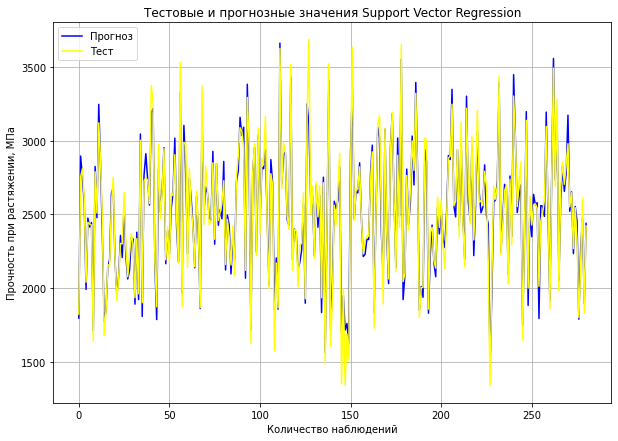

In [20]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr, label = "Прогноз", color = "blue")
plt.plot(y_test_1.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [21]:
#Третья модель - Метод К ближайших соседей
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)
y_pred_knn = knn.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
mse_knn_elast = mean_squared_error(y_test_1,y_pred_knn)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn.score(x_train_1, y_train_1)))
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast)))
print("Test score: {:.2f}".format(knn.score(x_test_1, y_test_1)))

K Neighbors Regressor  Results Train:
Test score: 0.24
K Neighbors Regressor  Results:
KNN_MAE:  403
KNN_MAPE: 0.17
KNN_MSE: 247796.06
KNN_RMSE: 497.79
Test score: -0.21


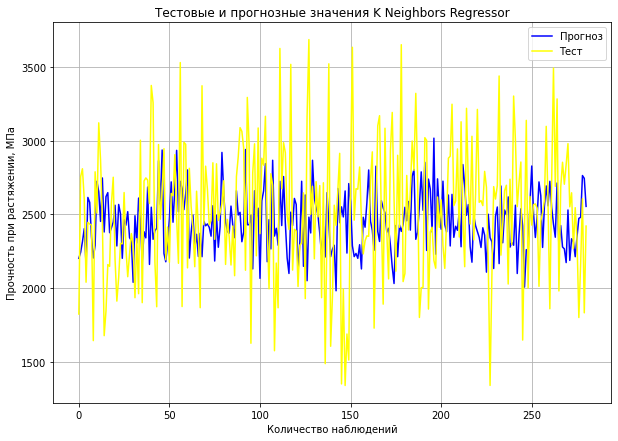

In [22]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn, label = "Прогноз", color = 'blue')
plt.plot(y_test_1.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [23]:
#Четвертая модель - Decision Tree Regressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train_1, y_train_1.values)
y_pred_dtr = dtr.predict(x_test_1)
mae_dtr = mean_absolute_error(y_pred_dtr, y_test_1)
mse_dtr_elast = mean_squared_error(y_test_1,y_pred_dtr)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(knn.score(x_train_1, y_train_1)))
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_dtr)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_dtr)))
print("Test score: {:.2f}".format(dtr.score(x_test_1, y_test_1)))


Decision Tree Regressor Results Train:
Test score: 0.24
Decision Tree Regressor Results:
DTR_MAE:  121
DTR_MSE: 23471.42
DTR_RMSE: 153.20
DTR_MAPE: 0.05
Test score: 0.89


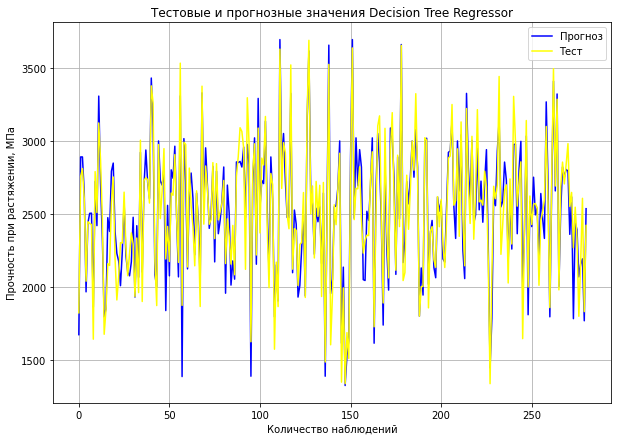

In [24]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr, label = "Прогноз", color = 'blue')
plt.plot(y_test_1.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [25]:
#Пятая модель - Метод линейной регрессии

lr = LinearRegression()
lr.fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
mse_lin_elast = mean_squared_error(y_test_1, y_pred_lr)
print('Linear Regression Results Train:')
print("Test score: {:.2f}".format(lr.score(x_train_1, y_train_1)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_1, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_lr)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast)))
print("Test score: {:.2f}".format(lr.score(x_test_1, y_test_1)))

Linear Regression Results Train:
Test score: 0.97
Linear Regression Results:
lr_MAE:  59
lr_MAPE: 0.02
lr_MSE: 5297.71
lr_RMSE: 72.79
Test score: 0.97


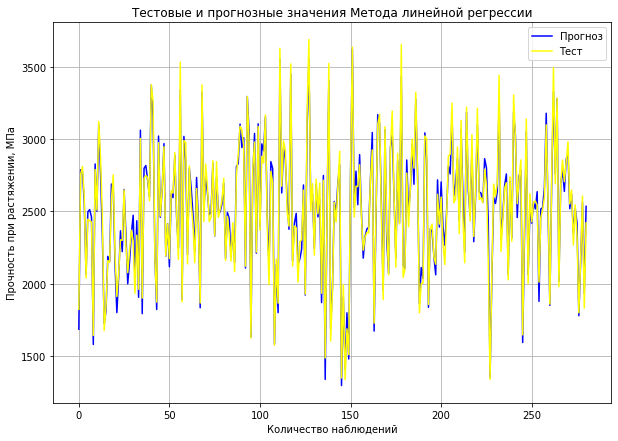

In [26]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Метода линейной регрессии")
plt.plot(y_pred_lr, label="Прогноз", color = 'blue')
plt.plot(y_test_1.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [27]:
#Шестая модель - Метод градиентного бустинга
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
mse_gbr_elast = mean_squared_error(y_test_1,y_pred_gbr)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr.score(x_train_1, y_train_1)))
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast)))
print("Test score: {:.2f}".format(gbr.score(x_test_1, y_test_1)))

Gradient Boosting Regressor Results Train:
Test score: 0.99
Gradient Boosting Regressor Results:
GBR_MAE:  60
GBR_MAPE: 0.02
GBR_MSE: 5554.09
GBR_RMSE: 74.53
Test score: 0.97


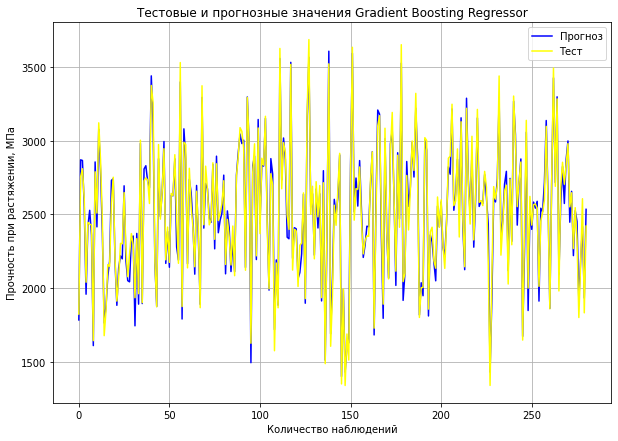

In [28]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз", color = "blue")
plt.plot(y_test_1.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [29]:
#Седьмая модель - Многослойный перцептрон
mlp = MLPRegressor(random_state = 1, max_iter = 500)
mlp.fit(x_train_1, y_train_1)
y_pred_mlp = mlp.predict(x_test_1)
mae_mlp = mean_absolute_error(y_pred_mlp, y_test_1)
mse_mlp_elast = mean_squared_error(y_test_1,y_pred_mlp)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp.score(x_train_1, y_train_1)))
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_1, y_pred_mlp)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_mlp)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast)))
print("Test score: {:.2f}".format(mlp.score(x_test_1, y_test_1)))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multi-layer Perceptron regressor Results Train:
Test score: -6.18
Multi-layer Perceptron regressor Results:
SGD_MAE:  1012
SGD_MAPE: 0.41
SGD_MSE: 1513876.18
SGD_RMSE: 1230.40
Test score: -6.42


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


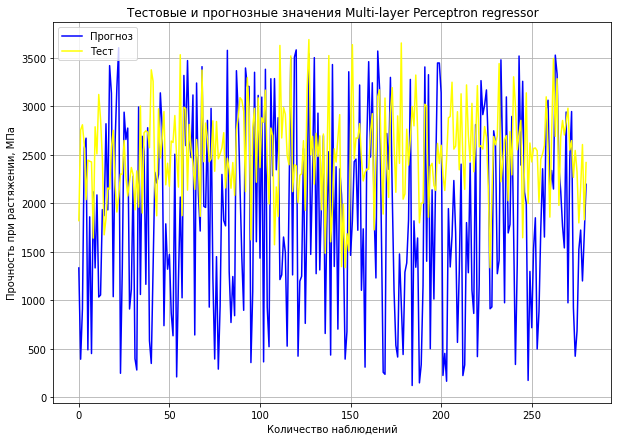

In [30]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp, label = "Прогноз", color = 'blue')
plt.plot(y_test_1.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [31]:
#Сравнение моделей по метрике MAE
mae_df = {'Regressor': ['RandomForest', 'Support Vector', 'KNeighbors','DecisionTree', 'Linear Regression', 'GradientBoosting', 'MLP'], 'MAE': [mae_rfr, mae_svr, mae_knr, mae_dtr, mae_lr, mae_gbr, mae_mlp]} 
mae_df = pd.DataFrame(mae_df)

mae_df

,Regressor,MAE
0,RandomForest,83.629415
1,Support Vector,68.846370
2,KNeighbors,402.584361
3,DecisionTree,121.081762
4,Linear Regression,59.132081
5,GradientBoosting,59.891014
6,MLP,1011.609230


In [32]:
#Сравнение моделей по метрике RMSE
rmse_df = {'Regressor': ['RandomForest', 'Support Vector', 'KNeighbors','DecisionTree', 'Linear Regression', 'GradientBoosting', 'MLP'], 'RMSE': [np.sqrt(mse_rfr_elast), np.sqrt(mse_svr_elast), np.sqrt(mse_knn_elast), np.sqrt(mse_dtr_elast), np.sqrt(mse_lin_elast), np.sqrt(mse_gbr_elast), np.sqrt(mse_mlp_elast)]} 
rmse_df = pd.DataFrame(rmse_df)

rmse_df

,Regressor,RMSE
0,RandomForest,105.445633
1,Support Vector,94.234929
2,KNeighbors,497.791178
3,DecisionTree,153.203851
4,Linear Regression,72.785352
5,GradientBoosting,74.525747
6,MLP,1230.396757


In [33]:
#Поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, кол-во блоков должно быть равно 10

#Поиск гиперпараметров модели для Метода случайного леса
#Узнаем какие можно использовать ключи
rfr.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [34]:
#Cоздаем словарь параметров
parametrs = { 'n_estimators': range (10, 100, 10),
              'max_depth': range(1, 5),
              'max_features': ['sqrt'],
              'criterion': ['squared_error','absolute_error'] }
grid = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)
grid.fit(x_train_1, y_train_1)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(1, 5), 'max_features': ['sqrt'],
                         'n_estimators': range(10, 100, 10)})

In [35]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [36]:
#Вывод гиперпараметров для оптимальной модели
print(grid.best_estimator_)
knr_upr = grid.best_estimator_
print(f'R2-score Метод случайного леса для прочности при растяжении, МПа: {knr_upr.score(x_test_1, y_test_1).round(3)}')

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=60,
                      random_state=33)
R2-score Метод случайного леса для прочности при растяжении, МПа: 0.878


In [37]:
#Подстановка оптимальных гиперпараметров в Модель случайного леса
rfr_grid = RandomForestRegressor(n_estimators = 60, criterion = 'mse', max_depth = 15, max_features = 'auto')
#Обучение модели
rfr_grid.fit(x_train_1, y_train_1)
predictions_rfr_grid = rfr_grid.predict(x_test_1)
#Оценка точности на тестовом наборе
mae_rfr_grid = mean_absolute_error(predictions_rfr_grid, y_test_1)
mae_rfr_grid

<ipython-input-37-85cf8a455083>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_grid.fit(x_train_1, y_train_1)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


75.37417250998908

In [38]:
#Добавляем новую строку
new_row_in_mae_df = {'Regressor': 'RandomForest_GridSearchCV', 'MAE': mae_rfr_grid}
mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)

In [39]:
mae_df


,Regressor,MAE
0,RandomForest,83.629415
1,Support Vector,68.846370
2,KNeighbors,402.584361
3,DecisionTree,121.081762
4,Linear Regression,59.132081
5,GradientBoosting,59.891014
6,MLP,1011.609230
7,RandomForest_GridSearchCV,75.374173


In [40]:
#Поиск гиперпараметров модели для Метода опорных векторов
#Узнаем какие можно использовать ключи
svr.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svr', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svr__C', 'svr__cache_size', 'svr__coef0', 'svr__degree', 'svr__epsilon', 'svr__gamma', 'svr__kernel', 'svr__max_iter', 'svr__shrinking', 'svr__tol', 'svr__verbose'])

In [41]:
#Cоздаем словарь параметров
svr_params = {'svr__C': [0.1, 1, 10, 100, 500, 1000], 
              'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svr__kernel': ['rbf']}
#Запуск обучения модели
gss = GridSearchCV(svr, svr_params, refit = True, cv = 10)

gss.fit(x_train_1, y_train_1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(C=500.0, epsilon=1.0))]),
             param_grid={'svr__C': [0.1, 1, 10, 100, 500, 1000],
                         'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svr__kernel': ['rbf']})

In [42]:
gss.best_params_

{'svr__C': 1000, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}

In [43]:
#Выводим гиперпараметры для оптимальной модели
print(gss.best_estimator_)
svr_1 = gss.best_estimator_
print(f'Метод опорных векторов для прочности при растяжении, МПа: {svr_1.score(x_test_1, y_test_1).round(3)}')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1000, epsilon=1.0, gamma=0.01))])
Метод опорных векторов для прочности при растяжении, МПа: 0.981


In [44]:
#подставим оптимальные гиперпараметры в модель для Метода опорных векторов
svr_1_grid = SVR(C=1000, epsilon=1.0, gamma=0.01)
#Обучаем модель
svr_1_grid.fit(x_train_1, y_train_1)

predictions_svr_1_grid = svr_1_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_svr_1_grid = mean_absolute_error(predictions_svr_1_grid, y_test_1)
mae_svr_1_grid

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


405.6653544589506

In [45]:
#Добавляем новую строку в таблицу
new_row_in_mae_df = {'Regressor': 'Support_Vector_GridSearchCV', 'MAE': mae_svr_1_grid}
mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Regressor,MAE
0,RandomForest,83.629415
1,Support Vector,68.846370
2,KNeighbors,402.584361
3,DecisionTree,121.081762
4,Linear Regression,59.132081
5,GradientBoosting,59.891014
6,MLP,1011.609230
7,RandomForest_GridSearchCV,75.374173
8,Support_Vector_GridSearchCV,405.665354


In [46]:
#Поиск гиперпараметров модели для Метода К ближайших соседей
knn = KNeighborsRegressor()

In [47]:
#Узнаем какие можно использовать ключи
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [48]:
#Создаем словарь параметров
knn_params = {'n_neighbors' : range(10, 100, 10), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запуск обучения модели
gs = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs.fit(x_train_1, y_train_1)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'algorithm': 'auto', 'n_neighbors': 90, 'weights': 'uniform'}

In [49]:
#Вывод гиперпараметров для оптимальной модели
print(gs.best_estimator_)
gs1 = gs.best_estimator_
print(f'R2-score Метод К ближайших соседей для прочности при растяжении, МПа: {gs1.score(x_test_1, y_test_1).round(3)}')

KNeighborsRegressor(n_neighbors=90)
R2-score Метод К ближайших соседей для прочности при растяжении, МПа: -0.045


In [50]:
#Подстановка оптимальных гиперпараметров в Модель метода К ближайших соседей
knn_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 90, weights = 'distance')
#Обучение модели
knn_grid.fit(x_train_1, y_train_1)
predictions_knn_grid = knn_grid.predict(x_test_1)
#Оценка точности на тестовом наборе
mae_knn_grid = mean_absolute_error(predictions_knn_grid, y_test_1)
mae_knn_grid

375.91086541547963

In [51]:
new_row_in_mae_df = {'Regressor': 'KNeighbors_GridSearchCV', 'MAE': mae_knn_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Regressor,MAE
0,RandomForest,83.629415
1,Support Vector,68.846370
2,KNeighbors,402.584361
3,DecisionTree,121.081762
4,Linear Regression,59.132081
5,GradientBoosting,59.891014
6,MLP,1011.609230
7,RandomForest_GridSearchCV,75.374173
8,Support_Vector_GridSearchCV,405.665354
9,KNeighbors_GridSearchCV,375.910865


In [52]:
#Поиск гиперпараметров модели для Decision Tree Regressor
#Узнаем какие можно использовать ключи
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [53]:
#Cоздаем словарь параметров
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
dtr_params = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}


In [54]:
#Запуск обучения модели
gs4 = GridSearchCV(dtr, dtr_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs4.fit(x_train_1, y_train_1)
dtr_3 = gs4.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'algorithm': 'auto', 'n_neighbors': 90, 'weights': 'uniform'}

In [55]:
#Вывод гиперпараметров для оптимальной модели
print(gs4.best_estimator_)
gs1 = gs4.best_estimator_
print(f'R2-score Decision Tree Regressor для прочности при растяжении, МПа: {gs4.score(x_test_1, y_test_1).round(3)}')

DecisionTreeRegressor(criterion='poisson', max_depth=9, max_features='auto',
                      min_samples_leaf=100, min_samples_split=200)
R2-score Decision Tree Regressor для прочности при растяжении, МПа: 0.808


In [57]:
#Подстановка оптимальных гиперпараметров в Модель метода К ближайших соседей
dtr_grid = DecisionTreeRegressor(criterion = 'poisson', max_depth = 9, max_features = 'auto', min_samples_leaf = 100, min_samples_split = 200)
#Обучение модели
dtr_grid.fit(x_train_1, y_train_1)
predictions_dtr_grid = dtr_grid.predict(x_test_1)
#Оценка точности на тестовом наборе
mae_dtr_grid = mean_absolute_error(predictions_dtr_grid, y_test_1)
mae_dtr_grid

154.1935585711819

In [58]:
#Добавляем новую строку в таблицу
new_row_in_mae_df = {'Regressor': 'DecisionTree_GridSearchCV', 'MAE': mae_dtr_grid} 
mae_df = mae_df.append(new_row_in_mae_df, ignore_index = True)
mae_df

,Regressor,MAE
0,RandomForest,83.629415
1,Support Vector,68.846370
2,KNeighbors,402.584361
3,DecisionTree,121.081762
4,Linear Regression,59.132081
5,GradientBoosting,59.891014
6,MLP,1011.609230
7,RandomForest_GridSearchCV,75.374173
8,Support_Vector_GridSearchCV,405.665354
9,KNeighbors_GridSearchCV,375.910865


In [59]:
#Выводы
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'regressor__C': [0.1, 1, 10, 100, 500, 1000]},
{'regressor': [RandomForestRegressor(n_estimators = 60)],'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state = 1, max_iter = 500)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]}]
grid = GridSearchCV (pipe, param_grid, cv = 10)
grid.fit(x_train_1, np.ravel(y_train_1))
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(x_test_1, y_test_1)))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(C=1000, gamma=0.01), 'regressor__C': 1000, 'regressor__gamma': 0.01}

Наилучшее значение правильности перекрестной проверки: 0.98
Правильность на тестовом наборе: 0.98


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor', SVR(C=1000, gamma=0.01))])


4.2 Прогноз модуля упругости при растяжении

In [61]:
#Тестовая и тренировочная выборки
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'], df[['Модуль упругости при растяжении, ГПа']], test_size = 0.3, random_state = 42)

In [62]:
#Просмотр данных в тренировочной выборке
x_train_2.head()

,Unnamed: 0,Unnamed: 0.1,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
133,0.035699,0.035699,0.000788,0.508366,0.171779,0.014713,0.006588,0.064762,0.029323,0.834700,0.082016,0.000000,0.001103,0.018947
756,0.257210,0.257210,0.000757,0.611438,0.192476,0.040326,0.007381,0.076075,0.085273,0.662533,0.039110,0.027723,0.003605,0.016555
693,0.196709,0.196709,0.000654,0.506999,0.161811,0.035033,0.006419,0.072027,0.151537,0.778046,0.059937,0.023082,0.001021,0.011056
853,0.307599,0.307599,0.000884,0.653120,0.134048,0.012694,0.006379,0.093680,0.026353,0.594799,0.027110,0.029545,0.002840,0.023343
501,0.152154,0.152154,0.001045,0.530991,0.302410,0.037908,0.005676,0.063815,0.264630,0.707925,0.048472,0.024280,0.001303,0.015433


In [63]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
133,81.053293
756,73.137189
693,73.559943
853,75.312292
501,72.843344
...,...
106,71.680491
270,72.461391
860,75.162208
435,73.119552


In [64]:
#Просмотр данных в тестовой выборке
x_test_2.head()

,Unnamed: 0,Unnamed: 0.1,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
321,0.122742,0.122742,0.000982,0.691239,0.230509,0.037351,0.007225,0.096948,0.182732,0.623372,0.069175,0.000000,0.003691,0.024196
70,0.020665,0.020665,0.000528,0.535568,0.340379,0.025130,0.006049,0.079381,0.153724,0.749701,0.057622,0.000000,0.002514,0.011042
209,0.059565,0.059565,0.000442,0.528025,0.397002,0.032378,0.005636,0.069426,0.162620,0.721710,0.051379,0.000000,0.000506,0.017217
656,0.205234,0.205234,0.001294,0.533859,0.234295,0.028961,0.006296,0.083388,0.150526,0.732507,0.085854,0.025303,0.001912,0.017507
685,0.236830,0.236830,0.001080,0.646066,0.046261,0.023982,0.007554,0.083714,0.223499,0.636418,0.064136,0.028083,0.001678,0.016530


In [65]:
y_test_2

,"Модуль упругости при растяжении, ГПа"
321,77.825677
70,69.181599
209,71.337572
656,77.856284
685,70.364622
...,...
371,69.492433
430,75.280332
292,74.148570
412,69.367179


In [66]:
#Создание функции для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [67]:
#Первая модель - Метод случайного леса
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2)))
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2)))

Random Forest Regressor Results Train:
Test score: 0.43
Random Forest Regressor Results:
RF_MAE:  2
RF_MAPE: 0.03
RF_MSE: 9.27
RF_RMSE: 3.05
Test score: -0.06


<ipython-input-67-247672fcdd34>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr2.fit(x_train_2, y_train_2.values)


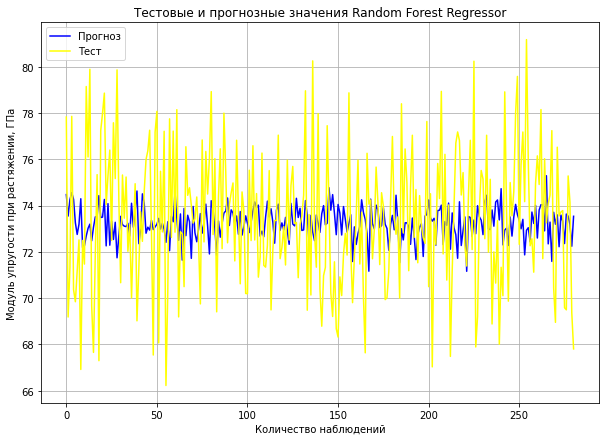

In [69]:
#Просмотр результатов на графике
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = "blue")
plt.plot(y_test_2.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [70]:
#Вторая модель - Метод опорных векторов
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(x_train_2, np.ravel(y_train_2))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
mse_svr_elast2 = mean_squared_error(y_test_2,y_pred_svr2)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr2.score(x_train_2, y_train_2)))
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2)))

Support Vector Regression Results Train:
Test score: 0.91
Support Vector Regression Results:
SVR_MAE: 3
SVR_MAPE: 0.04
SVR_MSE: 15.30
SVR_RMSE: 3.91
Test score: -0.76


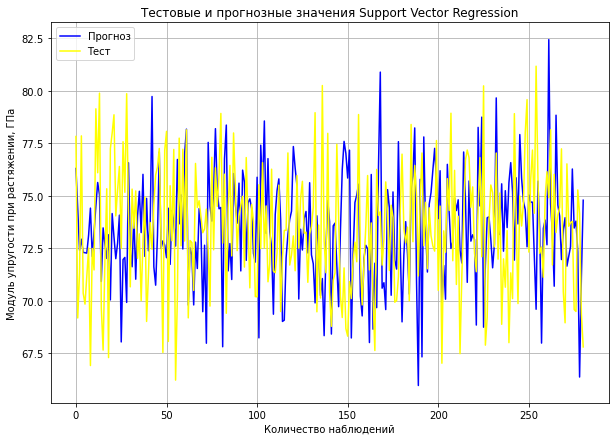

In [71]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз", color = "blue")
plt.plot(y_test_2.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [72]:
#Третья модель - Метод К ближайших соседей
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_knn2 = knn2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
mse_knn_elast2 = mean_squared_error(y_test_2,y_pred_knn2)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn2.score(x_train_2, y_train_2)))
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn2.score(x_test_2, y_test_2)))

K Neighbors Regressor  Results Train:
Test score: 0.20
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 10.45
KNN_RMSE: 3.23
Test score: -0.20


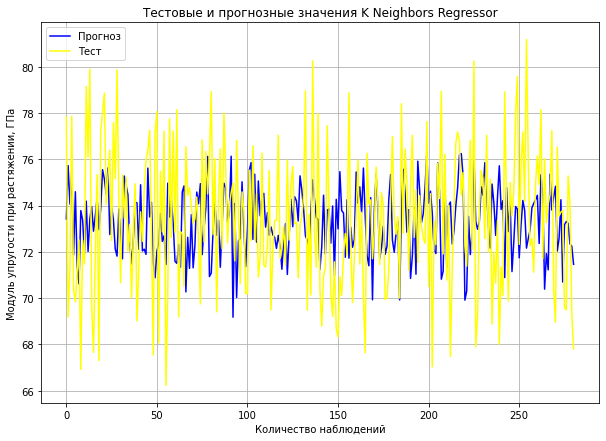

In [73]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'blue')
plt.plot(y_test_2.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [74]:
#Четвертая модель - Decision Tree Regressor
dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
mse_dtr_elast2 = mean_squared_error(y_test_2,y_pred_dtr2)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast2))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))

Decision Tree Regressor Results Train:
Test score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MSE: 19.76
DTR_RMSE: 4.45
DTR_MAPE: 0.05
Test score: -1.27


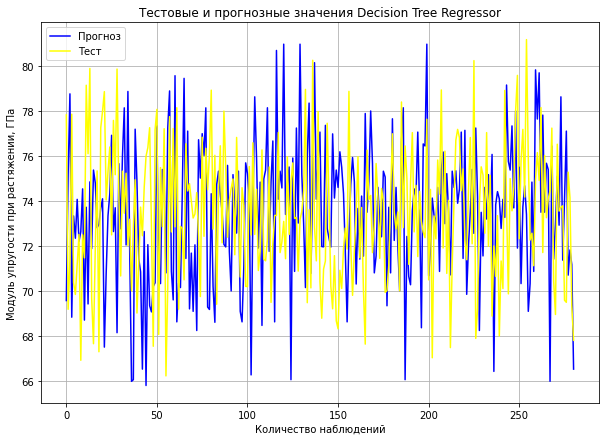

In [75]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз", color = 'blue')
plt.plot(y_test_2.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [76]:
#Пятая модель - Метод линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:')
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2)))

Linear Regression Results Train:
Test score: 0.01
Linear Regression Results:
lr_MAE:  2
lr_MAPE: 0.03
lr_MSE: 8.79
lr_RMSE: 2.96
Test score: -0.01


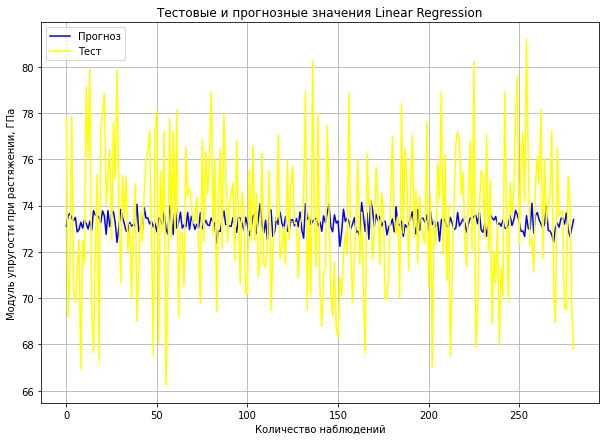

In [77]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'blue')
plt.plot(y_test_2.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [78]:
#Шестая модель - Метод градиентного бустинга
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
mse_gbr_elast2 = mean_squared_error(y_test_2,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr2.score(x_train_2, y_train_2)))
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))

Gradient Boosting Regressor Results Train:
Test score: 0.53
Gradient Boosting Regressor Results:
GBR_MAE:  2
GBR_MAPE: 0.03
GBR_MSE: 8.93
GBR_RMSE: 2.99
Test score: -0.02


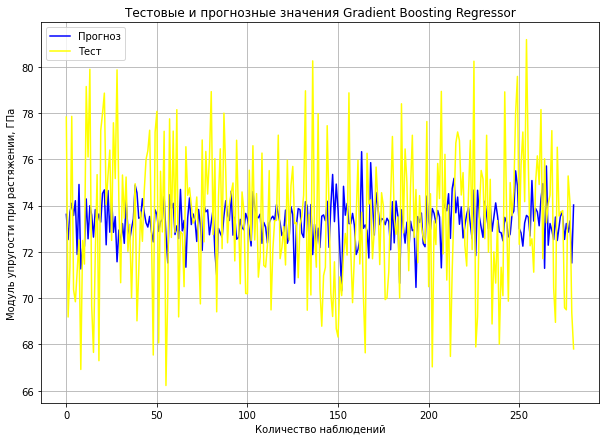

In [79]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз", color = "blue")
plt.plot(y_test_2.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [80]:
#Седьмая модель - Многослойный перцептрон
mlp2 = MLPRegressor(random_state = 1, max_iter = 500)
mlp2.fit(x_train_2, y_train_2)
y_pred_mlp2 = mlp2.predict(x_test_2)
mae_mlp2 = mean_absolute_error(y_pred_mlp2, y_test_2)
mse_mlp_elast2 = mean_squared_error(y_test_2,y_pred_mlp2)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp2.score(x_train_2, y_train_2)))
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_mlp2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_mlp2)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast2)))
print("Test score: {:.2f}".format(mlp2.score(x_test_2, y_test_2)))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multi-layer Perceptron regressor Results Train:
Test score: -0.78
Multi-layer Perceptron regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.05
SGD_MSE: 15.96
SGD_RMSE: 3.99
Test score: -0.83


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


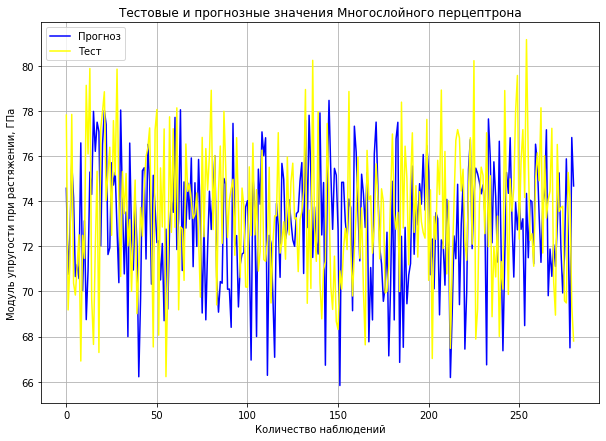

In [82]:
#Просмотр результатов на графике
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Многослойного перцептрона")
plt.plot(y_pred_mlp2, label = "Прогноз", color = 'blue')
plt.plot(y_test_2.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [83]:
#Сравнение моделей по метрике MAE
mae_df2 = {'Regressor': ['RandomForest', 'Support Vector', 'KNeighbors','DecisionTree', 'Linear Regression', 'GradientBoosting', 'MLP'], 
           'MAE': [mae_rfr2, mae_svr2, mae_knr2, mae_dtr2, mae_lr2, mae_gbr2, mae_mlp2]} 
mae_df2 = pd.DataFrame(mae_df2)

mae_df2

,Regressor,MAE
0,RandomForest,2.482423
1,Support Vector,3.162011
2,KNeighbors,2.573453
3,DecisionTree,3.722941
4,Linear Regression,2.412238
5,GradientBoosting,2.425166
6,MLP,3.309768


In [84]:
#Сравнение моделей по метрике RMSE
rmse_df2 = {'Regressor': ['RandomForest', 'Support Vector', 'KNeighbors','DecisionTree', 'Linear Regression', 'GradientBoosting', 'MLP'],
            'RMSE': [np.sqrt(mse_rfr_elast2), np.sqrt(mse_svr_elast2), np.sqrt(mse_knn_elast2), np.sqrt(mse_dtr_elast2), np.sqrt(mse_lin_elast2), np.sqrt(mse_gbr_elast2), np.sqrt(mse_mlp_elast2)]} 
rmse_df2 = pd.DataFrame(rmse_df2)

rmse_df2

,Regressor,RMSE
0,RandomForest,3.045093
1,Support Vector,3.911841
2,KNeighbors,3.231927
3,DecisionTree,4.445104
4,Linear Regression,2.963983
5,GradientBoosting,2.987870
6,MLP,3.994959


In [85]:
#Поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, кол-во блоков должно быть равно 10

#Поиск гиперпараметров модели для Метода случайного леса
parametrs = { 'n_estimators': range (10, 100, 10),
              'max_depth': range(1, 5),
              'max_features': ['sqrt'],
              'criterion': ['squared_error','absolute_error']}
grid21 = GridSearchCV(estimator = rfr2, param_grid  = parametrs, cv=10)
grid21.fit(x_train_2, y_train_2)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(1, 5), 'max_features': ['sqrt'],
                         'n_estimators': range(10, 100, 10)})

In [86]:
grid21.best_params_

{'criterion': 'absolute_error',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 90}

In [87]:
#Вывод гиперпараметров для оптимальной модели
print(grid21.best_estimator_)
knr_u = grid21.best_estimator_
print(f'Метод случайного леса для модуля упругости при растяжении: {knr_u.score(x_test_2, y_test_2).round(3)}')

RandomForestRegressor(criterion='absolute_error', max_depth=1,
                      max_features='sqrt', n_estimators=90, random_state=33)
Метод случайного леса для модуля упругости при растяжении: -0.008


In [88]:
#Подстановка оптимальных гиперпараметров в Модель случайного леса
rfr21_grid = RandomForestRegressor(n_estimators=90, criterion='absolute_error', max_depth=1, max_features='auto')
#Обучение модели
rfr21_grid.fit(x_train_2, y_train_2)
predictions_rfr21_grid = rfr21_grid.predict(x_test_2)
#Оценка точности на тестовом наборе
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y_test_2)
mae_rfr21_grid

<ipython-input-88-666b3e5befb5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr21_grid.fit(x_train_2, y_train_2)


2.408392237536643

In [89]:
#Добавляем новую строку
new_row_in_mae_df = {'Regressor': 'RandomForest2_GridSearchCV', 'MAE': mae_rfr21_grid} 
mae_df = mae_df2.append(new_row_in_mae_df, ignore_index = True)

In [90]:
mae_df

,Regressor,MAE
0,RandomForest,2.482423
1,Support Vector,3.162011
2,KNeighbors,2.573453
3,DecisionTree,3.722941
4,Linear Regression,2.412238
5,GradientBoosting,2.425166
6,MLP,3.309768
7,RandomForest2_GridSearchCV,2.408392


In [91]:
#Поиск гиперпараметров модели для Метода опорных векторов
#Cоздаем словарь параметров

svr2_params = {'svr__C': [0.1, 1, 10, 100, 500, 1000], 
              'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svr__kernel': ['rbf']}
#Запуск обучения модели
gss2 = GridSearchCV(svr, svr2_params, refit = True, cv = 10)

gss2.fit(x_train_2, y_train_2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(C=500.0, epsilon=1.0))]),
             param_grid={'svr__C': [0.1, 1, 10, 100, 500, 1000],
                         'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svr__kernel': ['rbf']})

In [92]:
gss2.best_params_

{'svr__C': 1, 'svr__gamma': 1, 'svr__kernel': 'rbf'}

In [93]:
#Выводим гиперпараметры для оптимальной модели
print(gss2.best_estimator_)
svr_2 = gss2.best_estimator_
print(f'Метод опорных векторов для модуля упругости при растяжении: {svr_2.score(x_test_2, y_test_2).round(3)}')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, epsilon=1.0, gamma=1))])
Метод опорных векторов для модуля упругости при растяжении: -0.004


In [94]:
#подставим оптимальные гиперпараметры в модель для Метода опорных векторов
svr_2_grid = SVR(C=1, epsilon=1.0, gamma=1)
#Обучаем модель
svr_2_grid.fit(x_train_2, y_train_2)

predictions_svr_2_grid = svr_2_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_svr_2_grid = mean_absolute_error(predictions_svr_2_grid, y_test_2)
mae_svr_2_grid

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.4183655998137215

In [106]:
#Добавляем новую строку в таблицу
new_row_in_mae_df = {'Regressor': 'Support_Vector_GridSearchCV', 'MAE': mae_svr_2_grid}
mae_df2 = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df2

,Regressor,MAE
0,RandomForest,2.482423
1,Support Vector,3.162011
2,KNeighbors,2.573453
3,DecisionTree,3.722941
4,Linear Regression,2.412238
5,GradientBoosting,2.425166
6,MLP,3.309768
7,RandomForest2_GridSearchCV,2.408392
8,Support_Vector_GridSearchCV,2.418366


In [96]:
#Поиск гиперпараметров модели для Метода К ближайших соседей
#Создаем словарь параметров
knn2_params = {'n_neighbors' : range(10, 100, 10), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запуск обучения модели
gs2 = GridSearchCV(knn, knn2_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs2.fit(x_train_2, y_train_2)
knn_21 = gs2.best_estimator_
gs2.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'algorithm': 'brute', 'n_neighbors': 80, 'weights': 'distance'}

In [97]:
#Вывод гиперпараметров для оптимальной модели
print(gs2.best_estimator_)
gs22 = gs2.best_estimator_
print(f'Метод К ближайших соседей для модуля упругости при растяжении, МПа: {gs2.score(x_test_2, y_test_2).round(3)}')

KNeighborsRegressor(algorithm='brute', n_neighbors=80, weights='distance')
Метод К ближайших соседей для модуля упругости при растяжении, МПа: -0.028


In [98]:
#Подстановка оптимальных гиперпараметров в Модель метода К ближайших соседей
knn2_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 80, weights = 'distance')
#Обучение модели
knn2_grid.fit(x_train_2, y_train_2)
predictions_knn2_grid = knn2_grid.predict(x_test_2)
#Оценка точности на тестовом наборе
mae_knn2_grid = mean_absolute_error(predictions_knn2_grid, y_test_2)
mae_knn2_grid

2.432400485983173

In [1]:
new_row_in_mae_df = {'Regressor': 'KNeighbors_GridSearchCV', 'MAE': mae_knn2_grid} 

mae_df2 = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df2

NameError: ignored

In [100]:
#Поиск гиперпараметров модели для Decision Tree Regressor
#Cоздаем словарь параметров
criterion2 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter2 = ['best', 'random']
max_depth2 = [3,5,7,9,11]
min_samples_leaf2 = [100,150,200]
min_samples_split2 = [200,250,300]
max_features2 = ['auto', 'sqrt', 'log2']
dtr_params2 = {'criterion': criterion2,
               'splitter': splitter2,
               'max_depth': max_depth2,
               'min_samples_split': min_samples_split2,
               'min_samples_leaf': min_samples_leaf2,
               'max_features': max_features2}

In [101]:
#Запуск обучения модели
gs42 = GridSearchCV(dtr, dtr_params2, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs42.fit(x_train_2, y_train_2)
dtr_32 = gs42.best_estimator_
gs42.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'splitter': 'random'}

In [102]:
#Вывод гиперпараметров для оптимальной модели
print(gs42.best_estimator_)
gs12 = gs42.best_estimator_
print(f'Метод Decision Tree Regressor для модуля упругости при растяжении, МПа: {gs42.score(x_test_2, y_test_2).round(3)}')

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='log2', min_samples_leaf=100,
                      min_samples_split=300, splitter='random')
Метод Decision Tree Regressor для модуля упругости при растяжении, МПа: -0.017


In [103]:
#Подстановка оптимальных гиперпараметров в Модель метода К ближайших соседей
dtr_grid2 = DecisionTreeRegressor(criterion = 'poisson', max_depth = 7, max_features = 'auto', min_samples_leaf = 100, min_samples_split = 300)
#Обучение модели
dtr_grid2.fit(x_train_2, y_train_2)
predictions_dtr_grid2 = dtr_grid2.predict(x_test_2)
#Оценка точности на тестовом наборе
mae_dtr_grid2 = mean_absolute_error(predictions_dtr_grid2, y_test_2)
mae_dtr_grid2

2.46964421303375

In [108]:
#Добавляем новую строку в таблицу
new_row_in_mae_df = {'Regressor': 'DecisionTree_GridSearchCV', 'MAE': mae_dtr_grid2} 
mae_df2 = mae_df.append(new_row_in_mae_df, ignore_index = True)
mae_df2

,Regressor,MAE
0,RandomForest,2.482423
1,Support Vector,3.162011
2,KNeighbors,2.573453
3,DecisionTree,3.722941
4,Linear Regression,2.412238
5,GradientBoosting,2.425166
6,MLP,3.309768
7,RandomForest2_GridSearchCV,2.408392
8,DecisionTree_GridSearchCV,2.469644


In [109]:
#Вывод
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'regressor__C': [0.1, 1, 10, 100, 500, 1000]},
{'regressor': [RandomForestRegressor(n_estimators=90)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state=1, max_iter=500)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]}]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(C=0.1, gamma=1), 'regressor__C': 0.1, 'regressor__gamma': 1}

Наилучшее значение правильности перекрестной проверки: -0.03
Правильность на тестовом наборе: -0.01


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor', SVR(C=0.1, gamma=1))])
